<a href="https://colab.research.google.com/github/electrolabopen/archivoscsv/blob/master/Copia_de_yoloColabDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run YOLO V3 on Colab for images/videos

Hello there,
Today, we will be discussing how can we use the Darknet project on Google Colab platform. For those who are not familiar with these terms:

- The Darknet project is an open-source written in C, which is a framework to develop deep neural networks.
- Yolo V3 is an object detection algorithm. It is one of the state of the art solution when **accuracy/processing power needed** metric is considered.
- Google Cola is a cloud-based data science workspace similar to the jupyter notebook. Each Collabrotary session is equipped with a virtual machine running 13 GB of ram and either a CPU, GPU, or TPU processor. In most case, all the required packages are already installed on these machines and you can quite easily start development using Google Collaboratory. It saves us from installing process and it provides us **easy to accessible GPU's** which is also **free** under some constraints.

Have a look Ted Talk by Joseph Redmon the developer of the darknet project. The talk is about Darknet and YOLO projects which titled as “How computers learn to recognize objects instantly” . Darknet project aims to create a new neural network framework which is completely focused on simplicity and performance. The thing which I like about is its clarity and performance. All the code is written in C, to define a deep learning network you should only create a config file which defines the layers. By this way, it does not lose its performance capabilities also it provides us easy to use interface for development with this library.

Since I love both YOLO project and Google Colab, I decided to create a tutorial to use them together. I create a GitHub repository and a Collaboratory notebook for this purpose

- [Colab Notebook](https://colab.research.google.com/drive/1DcXQ_pLtLVvQAwILZR-kF0ZJwhkp11Jl)
- [mozanunal/yoloOnGoogleColab](https://github.com/mozanunal/yoloOnGoogleColab)

{% youtube Cgxsv1riJhI%}

**Please check**
- [YOLO website](https://pjreddie.com/darknet/yolo/)
- [Darknet website](https://pjreddie.com/darknet/)
- [YOLOV3 Paper](https://arxiv.org/abs/1804.02767)



## Install
Go to the directory, clear and install everthing


*   Clone the project
*   Change make file configurations and make OPENCV and GPU enable
*   Install opencv library


In [2]:
!git clone https://github.com/mozanunal/yoloOnGoogleColab

Cloning into 'yoloOnGoogleColab'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 5), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [0]:

import cv2, os
import matplotlib.pyplot as plt
%matplotlib inline
  

In [4]:

!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

sample_data  yoloOnGoogleColab
Cloning into 'darknet'...
remote: Enumerating objects: 13456, done.
remote: Total 13456 (delta 0), reused 0 (delta 0), pack-reused 13456
Receiving objects: 100% (13456/13456), 11.98 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (9200/9200), done.
/content/darknet
Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu180

## `Compile and Configure`


* Compile YOLO
* Download YOLO weights



In [0]:
!make &> compile.log


In [6]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-05-14 06:35:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   311KB/s    in 12m 15s 

2020-05-14 06:47:32 (330 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## Test An Image

In [0]:
def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread("/content/darknet/predictions.jpg")
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [8]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
!ls

--2020-05-14 06:48:20--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg [following]
--2020-05-14 06:48:21--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68535 (67K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  66.93K  --.-KB/s    in 0.009s  

2020-05-14 06:48:21 (7.57 MB/s) - ‘test.jpg’ saved [68535/68535]

3rdparty	compile.log		include		       scripts
back

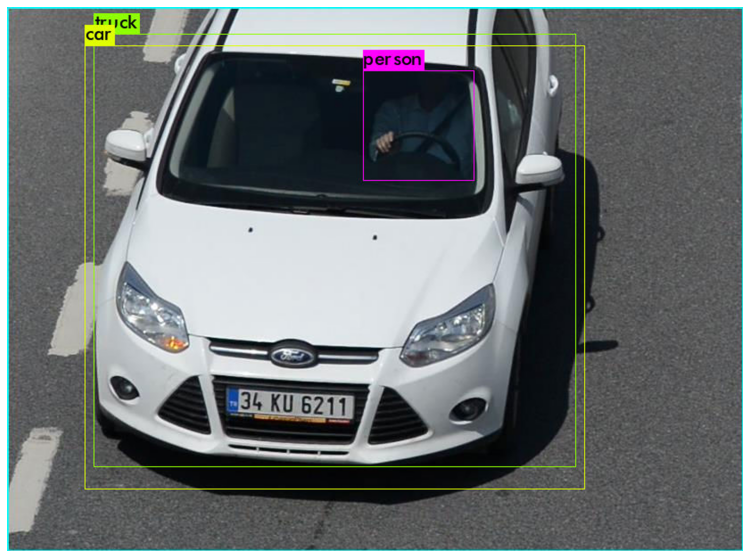

In [9]:
predictImage("test.jpg")



## Test with Video

In [0]:
def predictVideo(videoDir):
  os.system(""" cd /content/darknet && ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights \
  -dont_show {} -i 0 -out_filename res.avi
  """.format(videoDir))


In [0]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
!ls

--2020-05-14 03:56:46--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi [following]
--2020-05-14 03:56:47--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15897530 (15M) [application/octet-stream]
Saving to: ‘test.avi’

test.avi            100%[===================>]  15.16M  61.1MB/s    in 0.2s    

2020-05-14 03:56:48 (61.1 MB/s) - ‘test.avi’ saved [15897530/15897530]

3rdparty	compile.log		inclu

In [0]:
predictVideo("test.avi")


In [0]:
!du -h res.avi

93M	res.avi


In [0]:
from google.colab import files

files.download('/content/darknet/res.avi')



----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 53336, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil